<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


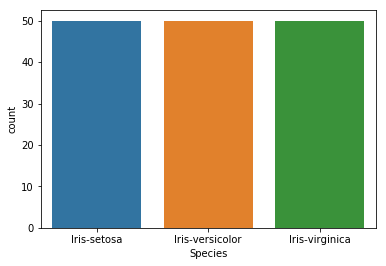

In [17]:
#Visualization of Iris Data Set, Feature Engineering, Data Partition, Model Selection, Model Testing and Evaluation 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
iris=pd.read_csv("Iris.csv") #: Load Iris Data set

#Data Exploration

iris.head(20);
iris.info();   #Check null data and their type

sns.countplot(x='Species',data=iris)  # Total Species types and their distribution
#plt.show()
#Remove id from iris, as it is identity column, not helping to classify
iris.drop('Id',axis=1,inplace=True)





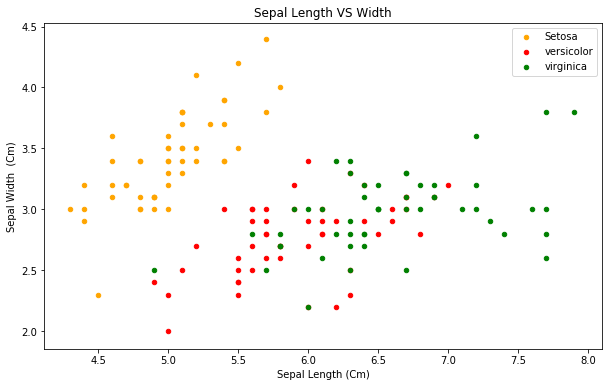

In [35]:
fig=iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange',label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red',label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green',label='virginica',ax=fig)
fig.set_xlabel('Sepal Length (Cm)')
fig.set_ylabel('Sepal Width  (Cm)')
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()  # It return the current figure,
fig.set_size_inches(10,6) # it will scale the image to require dimension
plt.show() 
#By the graph, we can observe iris of Setosa can be easily classify on the basis of
#Sepal Length and width less the 6.5 and greater than 3. but for versicolor and virginica is still hard to predict due to big common region
#So we should check relationship of other features like Petals.


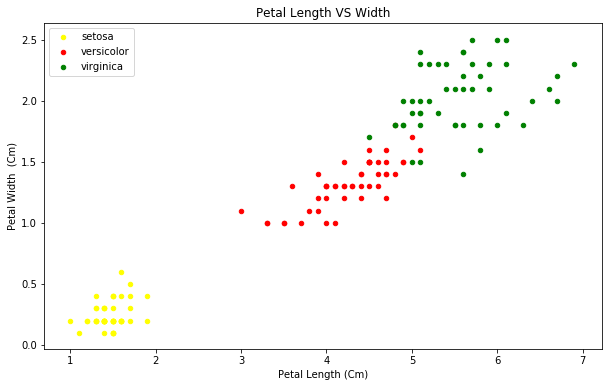

In [34]:
fig=iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='yellow',label='setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='red',label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green',label='virginica',ax=fig)
fig.set_xlabel('Petal Length (Cm)')
fig.set_ylabel('Petal Width  (Cm)')
fig.set_title("Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

#Now we can observe, it's quiet easy to classify rest of the types by the help of petals length and width
# as iris with length range (3,5.2) and width range (1.0 to 1.6) probabbly will be versicolor.Pettals can help better
# to classify Iris types


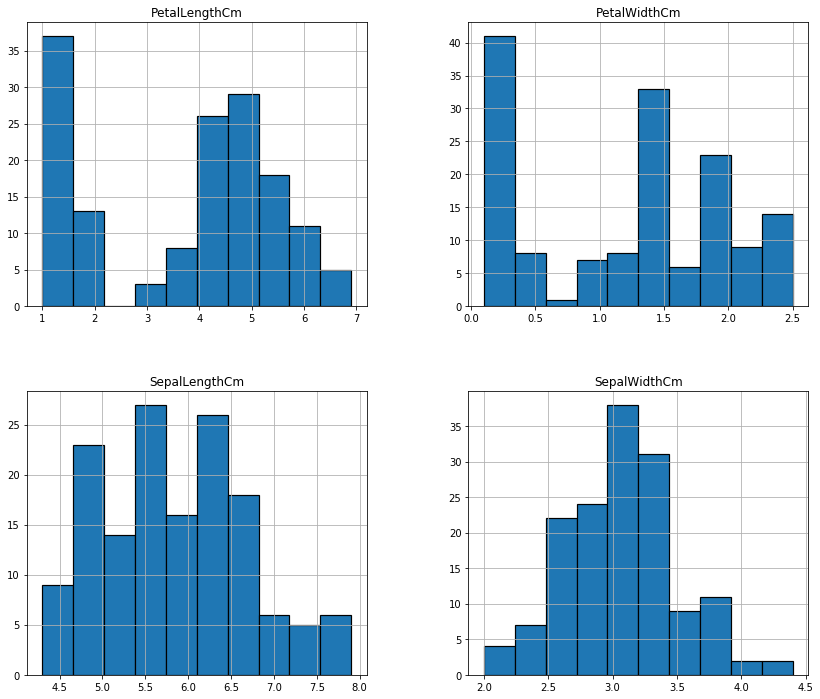

In [47]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(14,12)
plt.show()

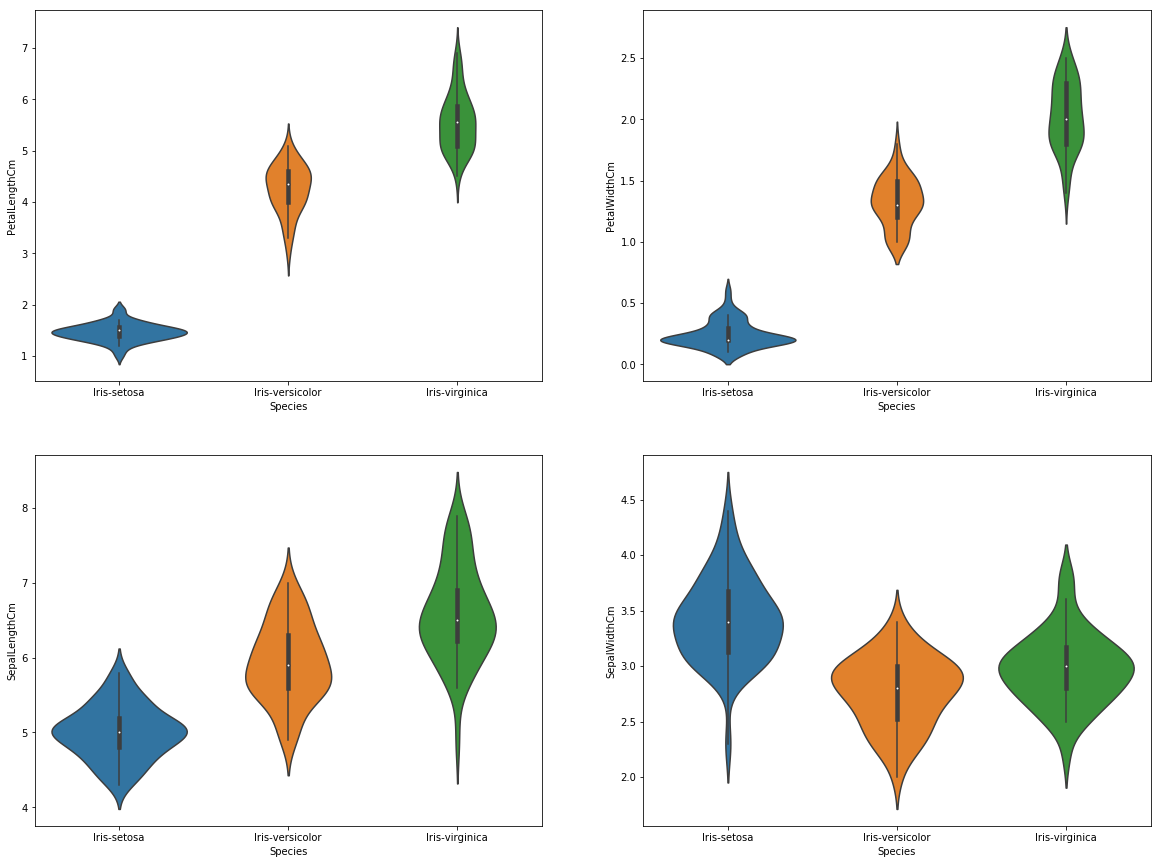

In [56]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)
#plt.show()

#We use vilon graph to understand the data density of columns, their distribution
#Forexample below Iris-setosa's PetalWidthCm column's value is dense across it's mean value, so mostly values are closer to the mean value.

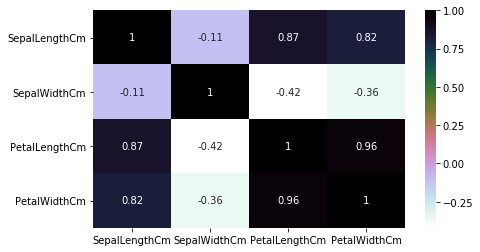

In [18]:
#Feature Engineering
# By above visualization, we can conclude petal length and width can classify 
# iris type, so we can use these columns as feature to predict Iris type.

#Build a Model  

#Let's import all packages for data division into train and test, Classification Algorithms and 
#for validation 

from sklearn.linear_model import LogisticRegression #For Logistic Regression
from sklearn.cross_validation import train_test_split #To split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier #for K nearest Neighbours
from sklearn import svm #For support Vector Algorithm
from sklearn import metrics #For Checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #For using Decision Tree Algorithm


#We have to find corealtion of features to select feature for training our model
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r')#draws heatmap on the bsis of corelation calculated by iris.corr()
plt.show()

#From the heatmap, we can check the corelation between multiple features
# Sepal Length and Width have very low corelation, whiel Petal length and 
# width have high corelation value. while the Sepal length, petal length and width have 
# high corelation as well.

In [85]:
# Splitting Data
train,test= train_test_split(iris, test_size=0.3) # It will split data into 30% test and 70% train data

print(train.shape)
print(test.shape)


(105, 5)
(45, 5)


In [86]:
# Preparing data for training
train_X=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]  #Input Features

train_y=train.Species # Label for input

test_X=test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

test_Y=test.Species

# Confirm the test and train data

train_X.head()
test_X.head()
train_y.head()

41        Iris-setosa
21        Iris-setosa
118    Iris-virginica
101    Iris-virginica
29        Iris-setosa
Name: Species, dtype: object

In [45]:
## Support Vector Machine (SVM)
model=svm.SVC()  #select the algorithm
model.fit(train_X, train_y)  #we train the algorithm with the training data and output
prediction=model.predict(test_X)
print('The accuracy of the SVM is:', metrics.accuracy_score(prediction,test_Y))



The accuracy of the SVM is: 0.955555555556


In [47]:
#Logistic Regression
model= LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of Regression model is:', metrics.accuracy_score(prediction,test_Y))



The accuracy of Regression model is: 0.977777777778


In [61]:
# Decision Tree
model=DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction=model.predict(test_X)
print('The accuracy of Decision Tree is:', metrics.accuracy_score(prediction, test_Y))


The accuracy of Decision Tree is: 0.933333333333


In [87]:
# K-Nearest Neighbours
model=KNeighborsClassifier(n_neighbors=13)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of K Nearest Neighbor with 13 neighbor is:',metrics.accuracy_score(prediction,test_Y))


The accuracy of K Nearest Neighbor with 13 neighbor is: 0.977777777778


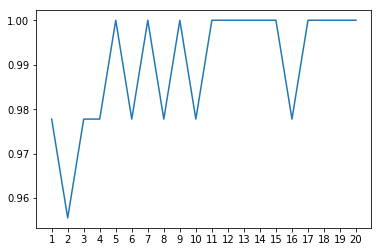

In [82]:
# Let's optimize KNN by testing with different K values

range_X=list(range(1,21))
range_Y=pd.Series()
input_Z=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for i in list(range(1,21)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    range_Y=range_Y.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(range_X, range_Y)
plt.xticks(input_Z)
plt.show()
